<a href="https://colab.research.google.com/github/aayushising/Hepatitis-mortality-prediction/blob/main/my_project_of_Final_Hepatitis_Mortality_Prediction_Modelling_with_Probability_using_Classification_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Hepatitis C

## Installing Dependencies

In [ ]:
!pip install Catboost joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Loading up the data

In [ ]:

df = pd.read_csv('/content/drive/My Drive/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


| Term | Full Name | Description |
|------|-----------|-------------|
| ALB  | Albumin | A protein made by the liver, important for maintaining fluid balance and transporting hormones, vitamins, and drugs. |
| ALP  | Alkaline Phosphatase | An enzyme related to the bile ducts; often increased when they are blocked. |
| ALT  | Alanine Aminotransferase | An enzyme that helps process proteins; high levels may indicate liver damage. |
| AST  | Aspartate Aminotransferase | An enzyme found in several parts of the body, including the liver and heart; high levels can indicate liver or heart damage. |
| BIL  | Bilirubin | A substance produced during the normal breakdown of red blood cells; elevated levels may indicate liver dysfunction or other conditions. |
| CHE  | Cholinesterase | An enzyme important for nervous system function; can be affected by liver disease and exposure to certain drugs and toxins. |
| CHOL | Cholesterol | A type of fat essential for the body, used to build cells and make vitamins and other hormones. |
| CREA | Creatinine | A waste product produced by muscles; high levels can indicate kidney dysfunction. |
| GGT  | Gamma-Glutamyl Transferase | An enzyme indicating liver or bile duct health. | 9 - 48 | IU/L |
| PROT | Protein | Overall protein levels in the blood, reflecting nutritional status and liver function. | 6.0 - 8.3 | g/dL |


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.dtypes

,0
Category,object
Age,int64
Sex,object
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64
CHOL,float64


In [ ]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
# Mapping numeric values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# Checking the data types again after the transformation
df.dtypes

,0
Category,int64
Age,int64
Sex,int64
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64
CHOL,float64


In [ ]:
# Checking for missing values in the dataset
df.isna().sum()

,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


In [ ]:
# Filling missing values with the median
df.fillna(df.median(), inplace=True)

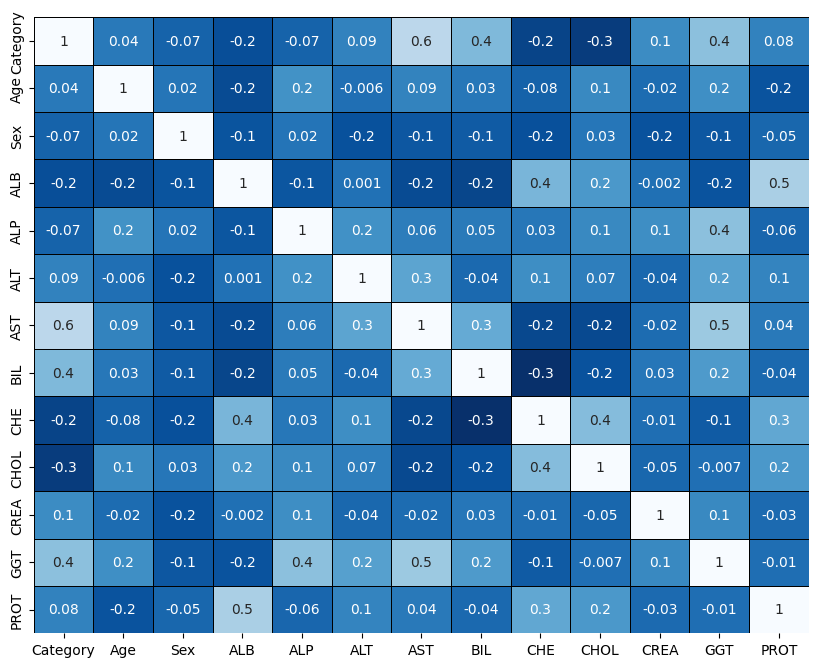

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='black');

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


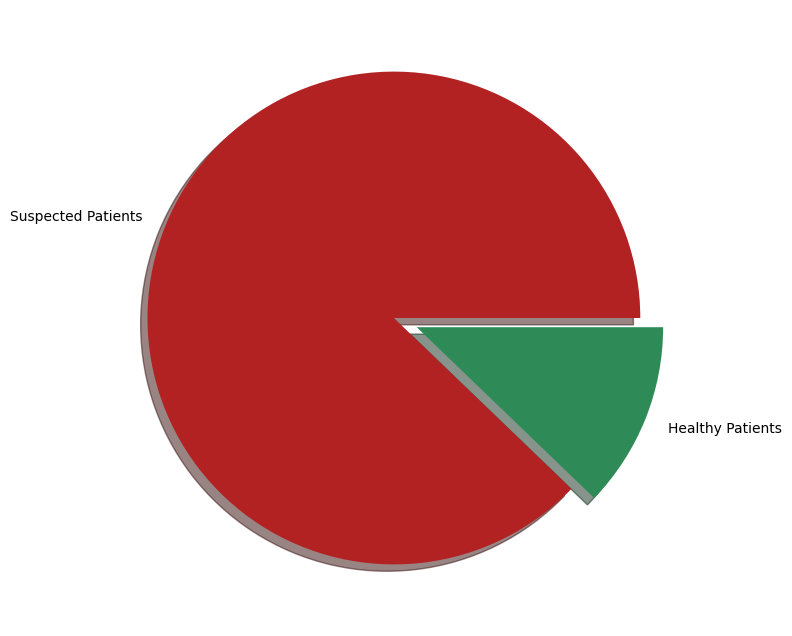

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["firebrick","seagreen"],
        labels=["Suspected Patients","Healthy Patients"],
        shadow = True,
        explode = (0, 0.1)
        )

plt.show()

In [ ]:
df.Sex.value_counts()

,count
Sex,
1,377
2,238


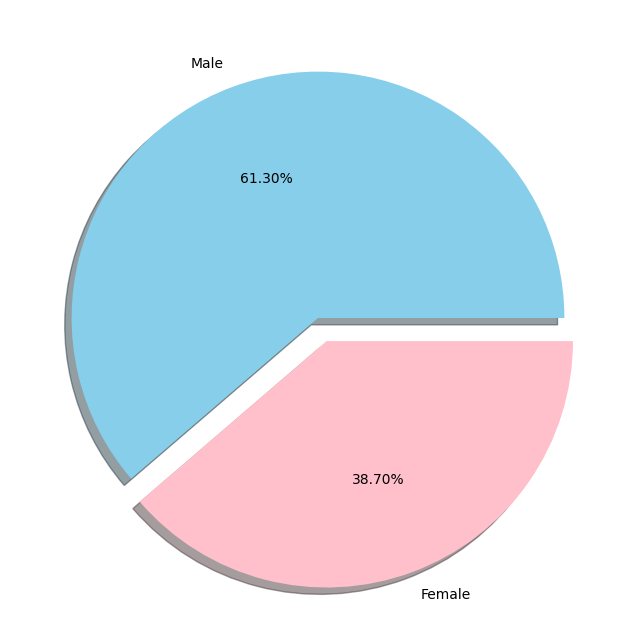

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["skyblue","pink"],
        labels=["Male","Female"],
        shadow = True,
        autopct="%1.2f%%",
        explode = (0, 0.1)
        )
plt.show()


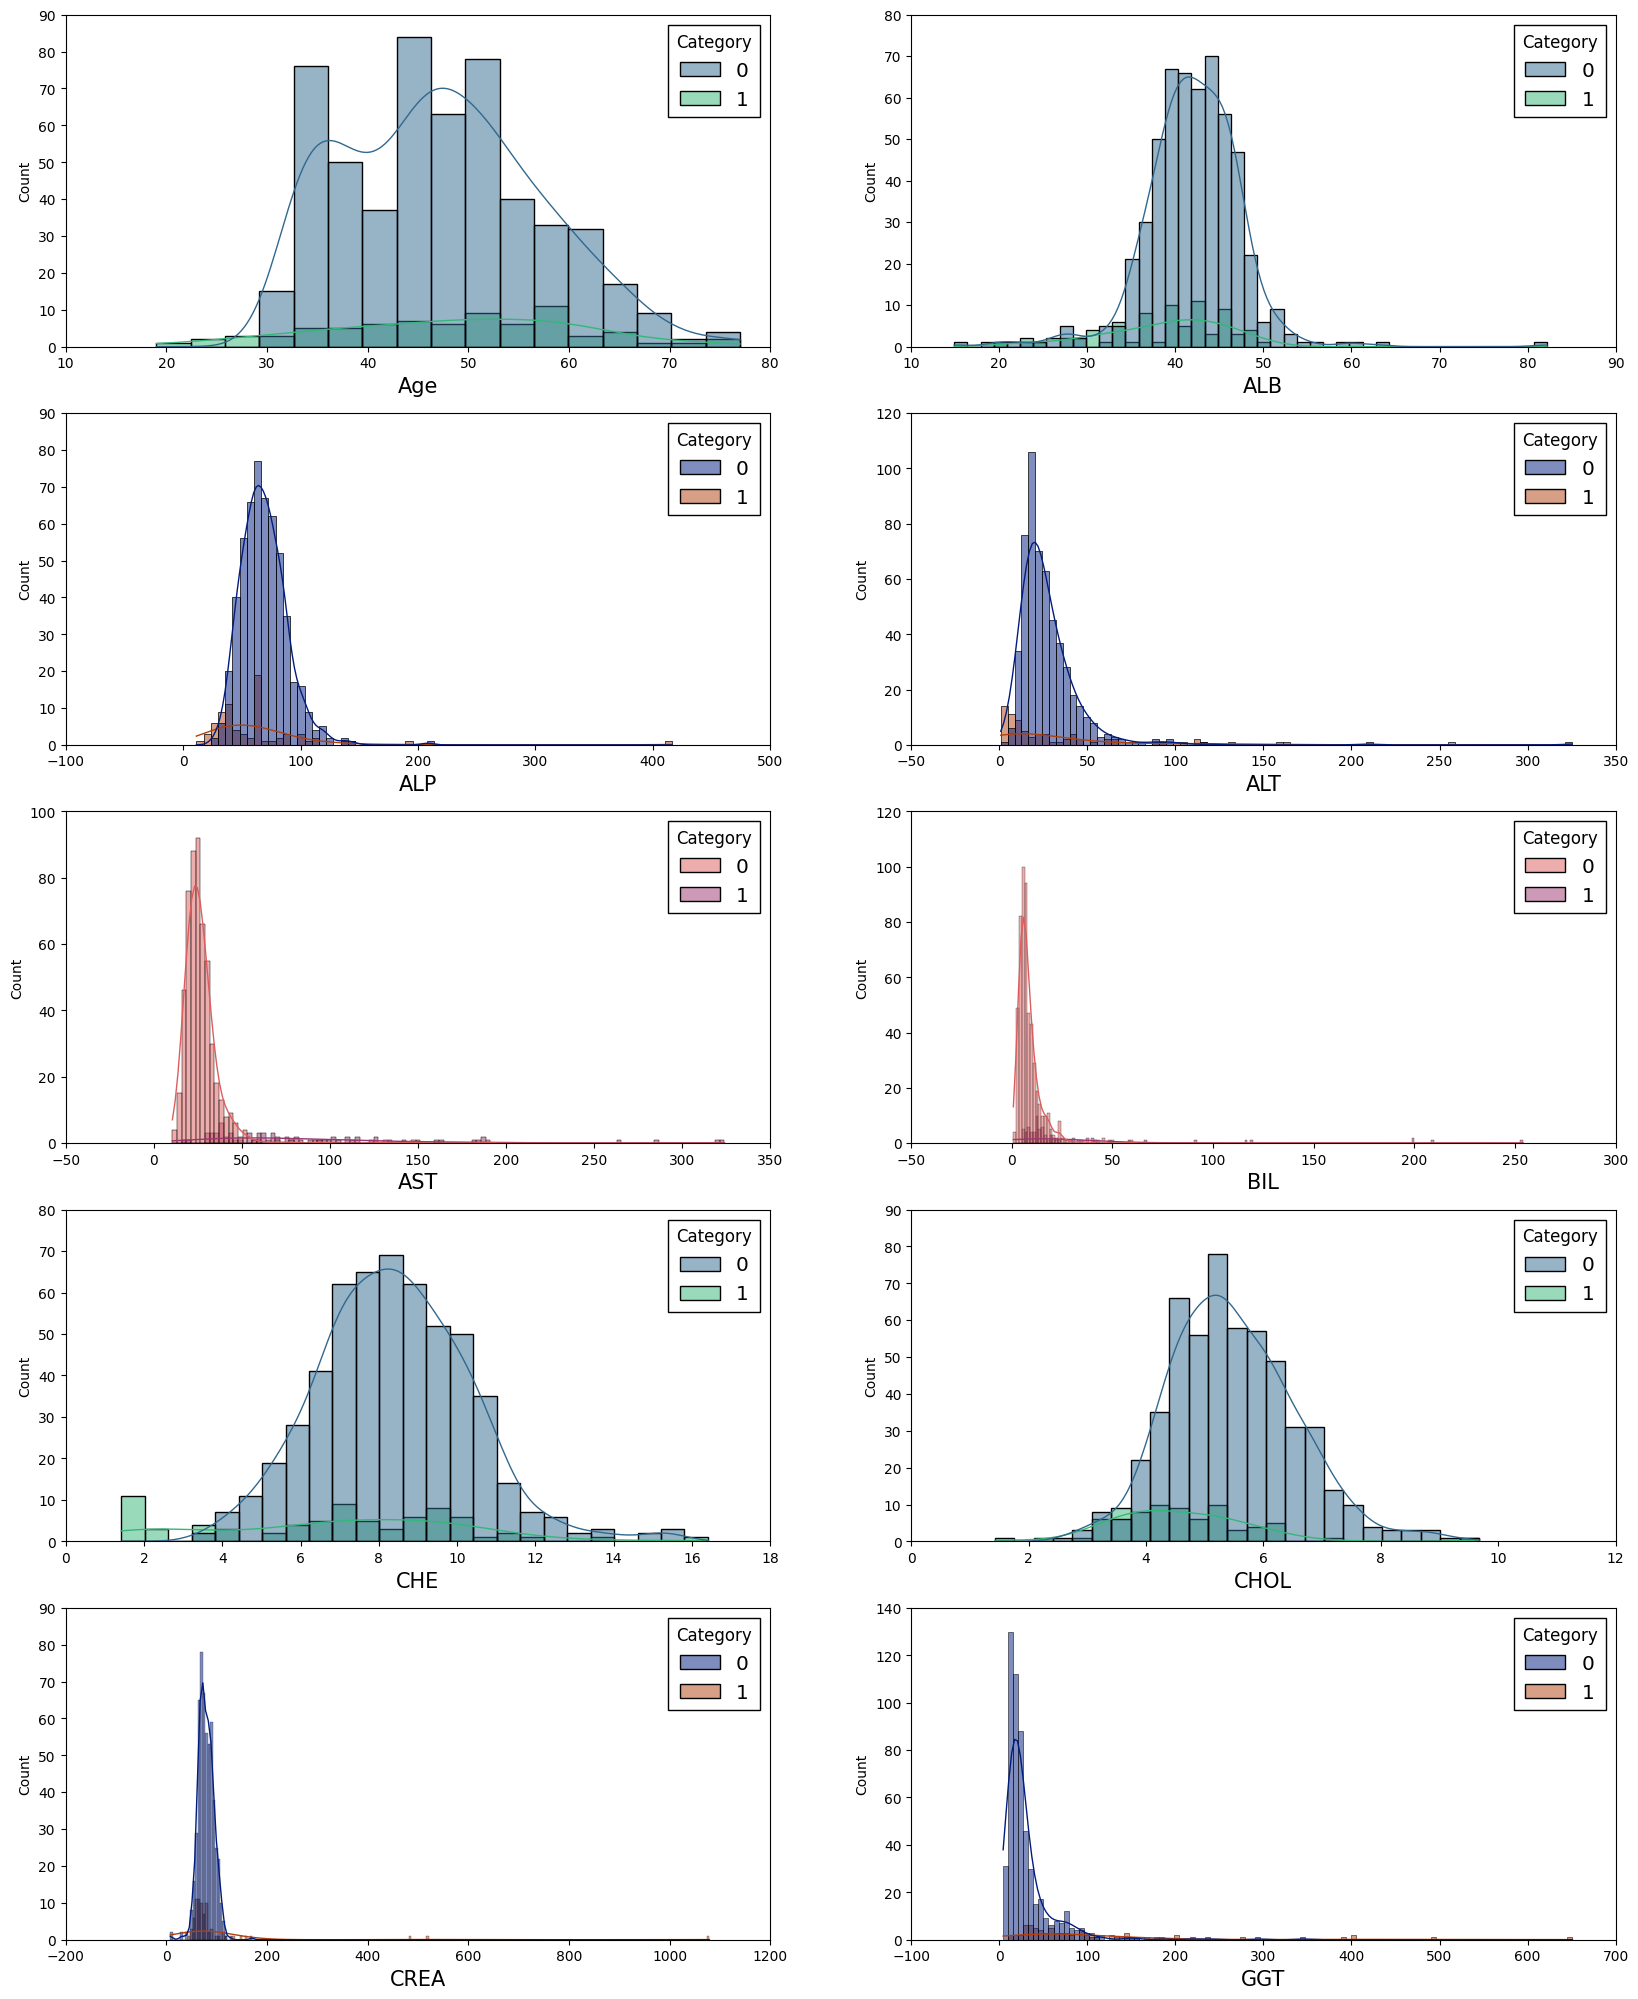

In [ ]:
fig, ax =plt.subplots(5,2, figsize=(20,25))
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

In [ ]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# y data
y = df["Category"]
y.head()

,Category
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the `Category` will be the y label and rest of the data will be the X or the input data.

In [ ]:
len(X_train), len(X_test)

(492, 123)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 88.6178861788618


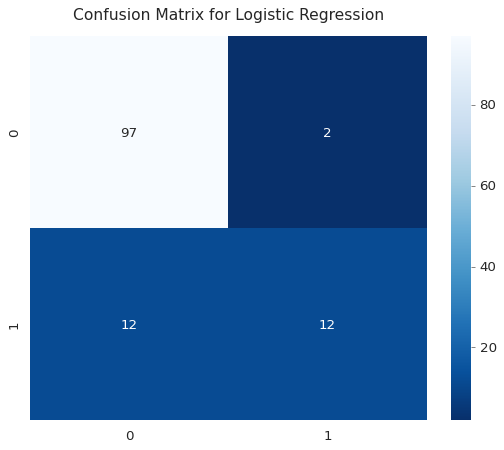

In [ ]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Having a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 93.4959349593496


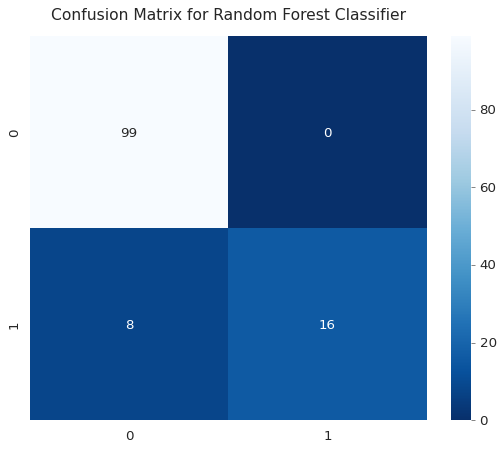

In [ ]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.67      0.80        24

    accuracy                           0.93       123
   macro avg       0.96      0.83      0.88       123
weighted avg       0.94      0.93      0.93       123



## K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 85.36585365853658


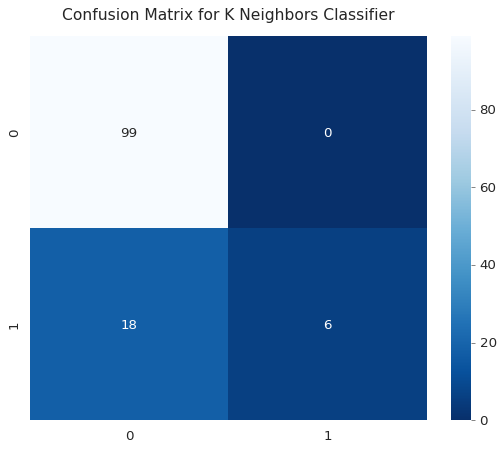

In [ ]:
# Confustion Matrix

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       1.00      0.25      0.40        24

    accuracy                           0.85       123
   macro avg       0.92      0.62      0.66       123
weighted avg       0.88      0.85      0.82       123



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 91.869918699187


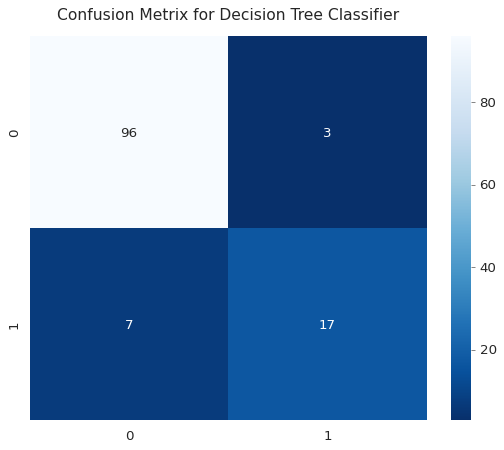

In [ ]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.85      0.71      0.77        24

    accuracy                           0.92       123
   macro avg       0.89      0.84      0.86       123
weighted avg       0.92      0.92      0.92       123



## CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.4056594	total: 54.3ms	remaining: 489ms
1:	learn: 0.3052358	total: 60ms	remaining: 240ms
2:	learn: 0.2281643	total: 67.5ms	remaining: 157ms
3:	learn: 0.1874827	total: 74.3ms	remaining: 111ms
4:	learn: 0.1540611	total: 80.8ms	remaining: 80.8ms
5:	learn: 0.1302461	total: 88.2ms	remaining: 58.8ms
6:	learn: 0.1100836	total: 92.6ms	remaining: 39.7ms
7:	learn: 0.0993443	total: 99.9ms	remaining: 25ms
8:	learn: 0.0894244	total: 106ms	remaining: 11.8ms
9:	learn: 0.0820818	total: 113ms	remaining: 0us


In [ ]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 91.869918699187


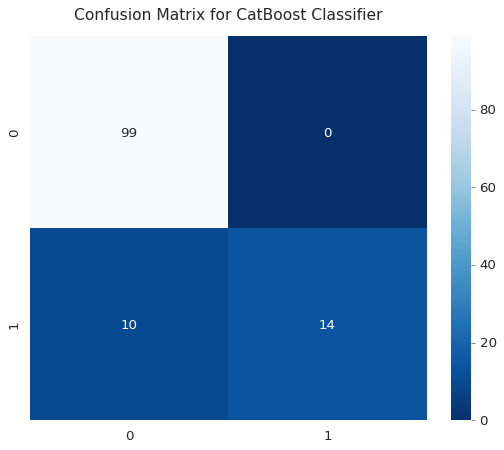

In [ ]:
# Confusion matrix
y_pred_cat = cat.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Classification Report of CatBoost Classifier

print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 94.3089430894309


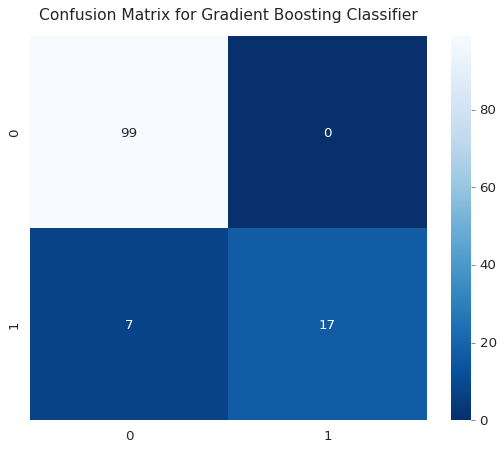

In [ ]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Classification Report of Gradient Boosting Classifier

print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



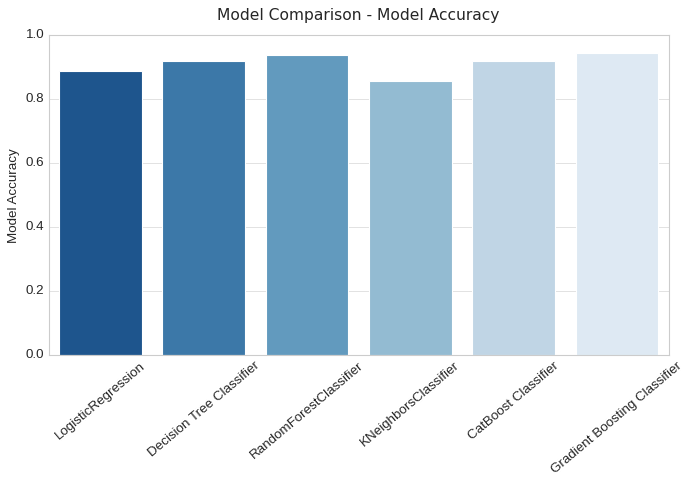

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Instead of plt.style.use("seaborn-whitegrid"), use:
plt.style.use('seaborn-v0_8-whitegrid')  # This is the correct style name for newer versions of Matplotlib/Seaborn.

# ... (rest of your code) ...

# Example:
x = ["LogisticRegression",
     "Decision Tree Classifier",
     "RandomForestClassifier",
     "KNeighborsClassifier",
     "CatBoost Classifier",
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

plt.show() # This might be needed to display the plot

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc,
                           param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [ ]:
grid_search_rfc.best_score_

0.9735772357723578

| Term | Full Name | Description | Tolerable Range | Units |
|------|-----------|-------------|-----------------|-------|
| ALB  | Albumin | Liver protein | 3.4 - 5.4 | g/dL |
| ALP  | Alkaline Phosphatase | Bile duct enzyme | 44 - 147 | IU/L |
| ALT  | Alanine Aminotransferase | Liver enzyme | 7 - 56 | IU/L |
| AST  | Aspartate Aminotransferase | Liver/heart enzyme | 10 - 40 | IU/L |
| BIL  | Bilirubin | Liver function indicator | 0.1 - 1.2 | mg/dL |
| CHE  | Cholinesterase | Nervous system enzyme | 8,500 - 20,000 | U/L |
| CHOL | Cholesterol | Fat for cell building | Less than 200 | mg/dL |
| CREA | Creatinine | Kidney function indicator | 0.84 - 1.21 | mg/dL |
| GGT  | Gamma-Glutamyl Transferase | Liver/bile duct enzyme | 9 - 48 | IU/L |
| PROT | Protein | Blood protein level | 6.0 - 8.3 | g/dL |



In [ ]:
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

In [ ]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rfc.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 4.13%.


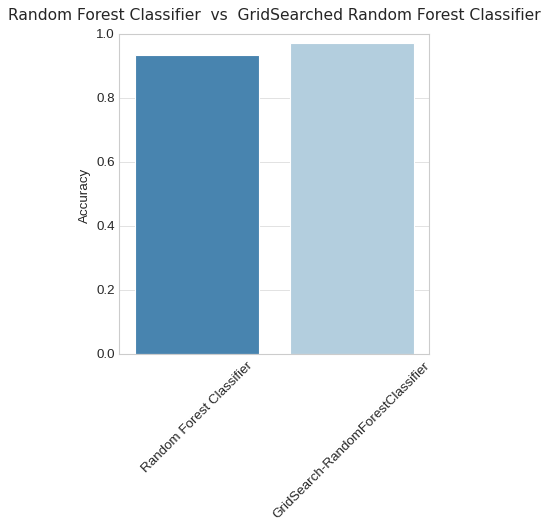

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Instead of plt.style.use("seaborn"), use:
plt.style.use('seaborn-v0_8-whitegrid')  # This is the correct style name for newer versions of Matplotlib/Seaborn.
# or any other seaborn style that suits you, for example:
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-white')

# ... (rest of your code) ...

# Example:
x = ["Random Forest Classifier",
     "GridSearch-RandomForestClassifier"]

y = [RandomForestClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Random Forest Classifier  vs  GridSearched Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

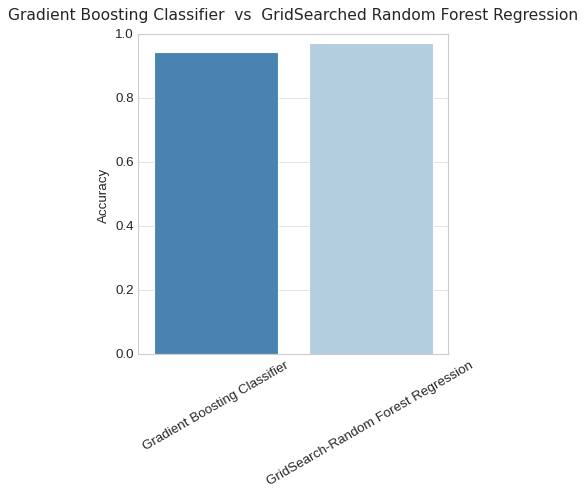

In [ ]:
# Comparing the GridSearch-Random Forest Regression and Gradient Boosting Classifier

# Instead of plt.style.use("seaborn"), use:
plt.style.use('seaborn-v0_8-whitegrid')  # This is the correct style name for newer versions of Matplotlib/Seaborn.
# or any other seaborn style that suits you, for example:
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-white')


x = ["Gradient Boosting Classifier",
     "GridSearch-Random Forest Regression"]

y = [GradientBoostingClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Gradient Boosting Classifier  vs  GridSearched Random Forest Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Classification Report of GridSearch-RandomForestRegression

print(classification_report(y_test, grid_search_rfc_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.94      0.67      0.78        24

    accuracy                           0.93       123
   macro avg       0.93      0.83      0.87       123
weighted avg       0.93      0.93      0.92       123

